<a href="https://colab.research.google.com/github/vidurp/notebooks/blob/main/PASCAL_VOC_Annotation_Parsing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Parse PASCAL Annotation Format v1.0

Noteboook to implement code to parse annotation files for PASCAL VOC Dataset

http://host.robots.ox.ac.uk/pascal/VOC/

In [ ]:
#Example Annotation Text File
# This is a sample string with 2 objects, although not present in PASCAL-VOC 2005,
# we can support it now

String = '''# PASCAL Annotation Version 1.00

Image filename : "VOC2005_1/PNGImages/ETHZ_motorbike-testset/motorbikes005.png"
Image size (X x Y x C) : 640 x 480 x 3
Database : "The VOC2005 Dataset 1 Database (ETHZ)"
Objects with ground truth : 2 { "A", "B" }

# Note that there might be other objects in the image
# for which ground truth data has not been provided.

# Top left pixel co-ordinates : (1, 1)

# Details for object 1 ("A")
Original label for object 1 "A" : "Class_A"
Bounding box for object 1 "A" (Xmin, Ymin) - (Xmax, Ymax) : (206, 242) - (427, 365)

# Details for object 2 ("B")
Original label for object 2 "B" : "Class_B"
Bounding box for object 2 "B" (Xmin, Ymin) - (Xmax, Ymax) : (112, 112) - (333, 333)
'''
print(String)

# PASCAL Annotation Version 1.00

Image filename : "VOC2005_1/PNGImages/ETHZ_motorbike-testset/motorbikes005.png"
Image size (X x Y x C) : 640 x 480 x 3
Database : "The VOC2005 Dataset 1 Database (ETHZ)"
Objects with ground truth : 2 { "A", "B" }

# Note that there might be other objects in the image
# for which ground truth data has not been provided.

# Top left pixel co-ordinates : (1, 1)

# Details for object 1 ("A")
Original label for object 1 "A" : "Class_A"
Bounding box for object 1 "A" (Xmin, Ymin) - (Xmax, Ymax) : (206, 242) - (427, 365)

# Details for object 2 ("B")
Original label for object 2 "B" : "Class_B"
Bounding box for object 2 "B" (Xmin, Ymin) - (Xmax, Ymax) : (112, 112) - (333, 333)



In [ ]:
import re

def ParsePascalString( str ):
    Lines = str.split('\n')
    ClassList = []
    BndBoxList = []
    for line in Lines:
        if 'filename' in line:
            line = line.split(':')
            FileName = re.findall(r'(?<=["\']).*?(?=["\'])', line[1])
        if 'Original' in line:
            line = line.split(':')
            ClassList.append(re.findall(r'(?<=["\']).*?(?=["\'])', line[1]))
        if 'Image size' in line:
            line = line.split(':')
            ImageSize  = re.findall('\d+',line[1])
        if 'Bounding' in line:
            line = line.split(':')
            BndBoxList.append(re.findall('\d+',line[1]))
        if 'Objects with ground truth' in line:
            line = line.split(':')
            NumObjects = re.findall(r'\d+', line[1])

    Dict = {
        'filepath' : FileName[0],
        'numobjects' : NumObjects[0],
        'imagesize' : {
            'width': ImageSize[0],
            'height': ImageSize[1],
            'channels': ImageSize[2]
        },
        'object' : []
    }

    # Populate all Objects
    for Idx in range(int(NumObjects[0])):
        Obj = {
            'label' : ClassList[Idx][0],
            'bndbox' : {
                'xmin': BndBoxList[Idx][0],
                'ymin': BndBoxList[Idx][1],
                'xmax': BndBoxList[Idx][2],
                'ymax': BndBoxList[Idx][3]
                }
        }

        Dict['object'].append(Obj)

    return ( Dict )

In [ ]:
# test parsing
print(ParsePascalString(String))

{'filepath': 'VOC2005_1/PNGImages/ETHZ_motorbike-testset/motorbikes005.png', 'numobjects': '2', 'imagesize': {'width': '640', 'height': '480', 'channels': '3'}, 'object': [{'label': 'Class_A', 'bndbox': {'xmin': '206', 'ymin': '242', 'xmax': '427', 'ymax': '365'}}, {'label': 'Class_B', 'bndbox': {'xmin': '112', 'ymin': '112', 'xmax': '333', 'ymax': '333'}}]}


# Get the dataset

In [ ]:
!wget http://host.robots.ox.ac.uk/pascal/VOC/download/voc2005_1.tar.gz

--2025-01-12 19:23:30--  http://host.robots.ox.ac.uk/pascal/VOC/download/voc2005_1.tar.gz
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 487614356 (465M) [application/x-gzip]
Saving to: ‘voc2005_1.tar.gz’

voc2005_1.tar.gz    100%[===================>] 465.02M  23.9MB/s    in 21s     

2025-01-12 19:23:51 (22.5 MB/s) - ‘voc2005_1.tar.gz’ saved [487614356/487614356]



In [ ]:
import tarfile
with tarfile.open('voc2005_1.tar.gz', 'r:gz') as tar:
        tar.extractall(path='.')


In [ ]:
# check number for files in PASCAL VOC 2005 set
import os
ImageFileCount = 0
for root, dir, files in os.walk('/content/VOC2005_1/PNGImages'):
    print(f'Dir {root} has {len(dir)} dirs, {len(files)} files')
    ImageFileCount = ImageFileCount + len(files)

print(f'Total Files {ImageFileCount}')

Dir /content/VOC2005_1/PNGImages has 9 dirs, 0 files
Dir /content/VOC2005_1/PNGImages/ETHZ_motorbike-testset has 0 dirs, 95 files
Dir /content/VOC2005_1/PNGImages/TUGraz_cars has 0 dirs, 271 files
Dir /content/VOC2005_1/PNGImages/UIUC_TestImages has 0 dirs, 136 files
Dir /content/VOC2005_1/PNGImages/TUGraz_person has 0 dirs, 168 files
Dir /content/VOC2005_1/PNGImages/Caltech_cars has 0 dirs, 14 files
Dir /content/VOC2005_1/PNGImages/Caltech_motorbikes_side has 0 dirs, 335 files
Dir /content/VOC2005_1/PNGImages/ETHZ_sideviews-cars has 0 dirs, 50 files
Dir /content/VOC2005_1/PNGImages/TUGraz_bike has 0 dirs, 228 files
Dir /content/VOC2005_1/PNGImages/UIUC_TestImages_Scale has 0 dirs, 76 files
Total Files 1373


# JSONify the Annotations

In [ ]:
import json
def CreateJSONFromPascalDataSet( RootFilePath, JSONFileName ):
    """
    Creates a JSON File from a Tree Structure of PASCAL VOC image data
    PASCAL - Pattern Analysis, Statistical Modeling & Computational Learning
             built by University of Oxford. The root directory is expected in the
             following format
              VOC
              +->Annotations
                    +->Class1
                    +->Class2
              +->GTMasks
                    +->Class1
                    +->Class2
              +->PNGImages
                    +->Class1
                    +->Class2

    Args:
      RootFilePath - Dataset Root directory
      JSONFileName - JSON File to save

    Returns:
       void
    """
    # Write the data to a JSON file
    JsonData = { 'Files' : [],
                 'labels' : []
    }

    Idx = 0
    with open(JSONFileName, "w") as outfile:
        for Root, Dirs, Files in os.walk( RootFilePath + '/Annotations' ):
            for File in Files:
                with open(Root + '/' + File, 'r') as TextFile:
                    Text = TextFile.read()
                    TextFile.close()
                    tokens = ParsePascalString( Text )
                    JsonData[ 'Files' ].append(tokens)
                    Idx = Idx + 1

        # Write num images to dict
        JsonData['NumImages'] = Idx

        # Write class lables to dict
        labels = os.listdir( RootFilePath + '/Annotations' )
        for Idx in range(len(labels)):
            JsonData['labels'].append({'label' : labels[Idx]})


        # convert dict to json
        json_string = json.dumps(JsonData)
        # write json  to disc
        outfile.write(json_string)
        outfile.close()




In [ ]:
os.listdir('/content/VOC2005_1/Annotations')

['ETHZ_motorbike-testset',
 'TUGraz_cars',
 'UIUC_TestImages',
 'TUGraz_person',
 'Caltech_cars',
 'Caltech_motorbikes_side',
 'ETHZ_sideviews-cars',
 'TUGraz_bike',
 'UIUC_TestImages_Scale']

In [ ]:
CreateJSONFromPascalDataSet('/content/VOC2005_1','test.json')

#Visualize Random PASCAL VOC data from JSON

In [195]:
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy
import random

In [131]:
with open('test.json', 'r') as f:
    data = json.load(f)

data.keys()

dict_keys(['Files', 'labels', 'NumImages'])

In [141]:
classes = data['labels']
classes,data['labels'][0]['label']

([{'label': 'ETHZ_motorbike-testset'},
  {'label': 'TUGraz_cars'},
  {'label': 'UIUC_TestImages'},
  {'label': 'TUGraz_person'},
  {'label': 'Caltech_cars'},
  {'label': 'Caltech_motorbikes_side'},
  {'label': 'ETHZ_sideviews-cars'},
  {'label': 'TUGraz_bike'},
  {'label': 'UIUC_TestImages_Scale'}],
 'ETHZ_motorbike-testset')

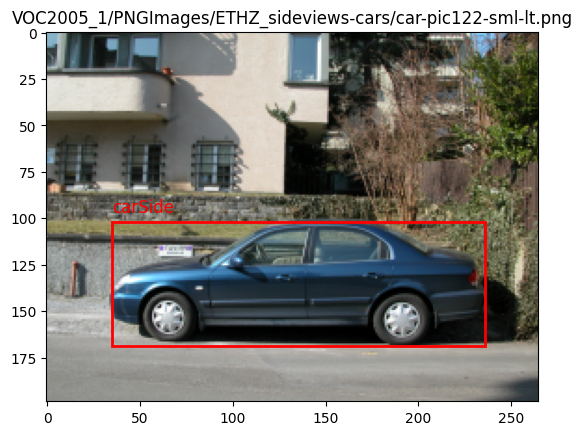

In [208]:
RandImg = random.choice(data['Files'])
FilePath = RandImg['filepath']
img = plt.imread(FilePath)
fig, ax = plt.subplots()
plt.imshow(img)

Objects = RandImg['object']
for idx in range(len(Objects)):
    obj = Objects[idx]
    label = obj['label']
    xmin = int(obj['bndbox']['xmin'])
    ymin = int(obj['bndbox']['ymin'])
    xmax = int(obj['bndbox']['xmax'])
    ymax = int(obj['bndbox']['ymax'])
    bbox = [ xmin, ymin, xmax, ymax ]
    # Create a Rectangle patch
    rect = patches.Rectangle((xmin, ymin), (xmax-xmin), (ymax-ymin), linewidth=2, edgecolor='r', facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)
    plt.text(xmin, ymin - 5, label, fontsize=12, color='r')
    plt.title(f'{FilePath}')




# Create Tensorflow Dataset